# LSTM Test Code

In [ ]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# I. LSTM - without Normalization

> ## 1) Sample Data

* Inputs 데이터 생성(100, 5, 1)

In [ ]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

* Outputs 데이터 생성(100, 1)

In [ ]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

* 80:20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras LSTM Modeling

### (1) Model Define & Summary
* Unit(output_dim) : 3
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit만 출력
* layers.Dense(1) : y_hat


In [ ]:
from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'LSTM_1')
model_1.add(layers.LSTM(3,
                        input_shape = (5, 1), 
                        return_sequences = False))
model_1.add(layers.Dense(1))

model_1.summary()

Model: "LSTM_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3)                 60        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [ ]:
model_1.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

### (3) Model Fit

In [ ]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 56ms/step - loss: 3792.1829 - accuracy: 0.0000e+00 - val_loss: 3745.3521 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 3788.9363 - accuracy: 0.0000e+00 - val_loss: 3742.0632 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 3785.5801 - accuracy: 0.0000e+00 - val_loss: 3738.7493 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 3782.1987 - accuracy: 0.0000e+00 - val_loss: 3735.3086 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 3778.6250 - accuracy: 0.0000e+00 - val_loss: 3731.6470 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 3774.8274 - accuracy: 0.0000e+00 - val_loss: 3727.4277 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - lo

### (4) Model Predict

In [ ]:
y_hat = model_1.predict(X_test)

### (5) 학습 결과 시각화

* Loss 감소

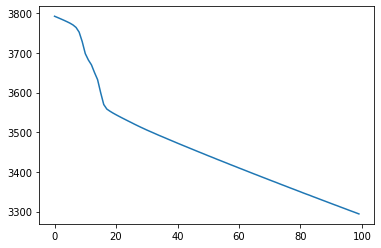

In [ ]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

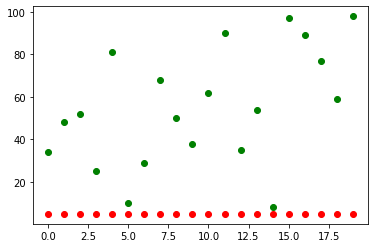

In [ ]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# II. LSTM - with Normalization

> ## 1) Sample Data - with Normalization

In [ ]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras LSTM Modeling

### (1) Model Define & Summary
* None : input_length 자동 맞춤


In [ ]:
model_2 = models.Sequential(name = 'LSTM_2')
model_2.add(layers.LSTM(3,
                        input_shape = (None, 1), 
                        return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "LSTM_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [ ]:
model_2.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

### (3) Model Fit

In [ ]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 53ms/step - loss: 0.2857 - accuracy: 0.0125 - val_loss: 0.2581 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2393 - accuracy: 0.0125 - val_loss: 0.2146 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1990 - accuracy: 0.0125 - val_loss: 0.1749 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1623 - accuracy: 0.0125 - val_loss: 0.1406 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1300 - accuracy: 0.0125 - val_loss: 0.1120 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1048 - accuracy: 0.0125 - val_loss: 0.0873 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0819 - accuracy: 0.0125 - val_loss: 0.0682 - val_accur

### (4) Model Predict

In [ ]:
y_hat = model_2.predict(X_test)

### (5) 학습 결과 시각화

* Loss 감소

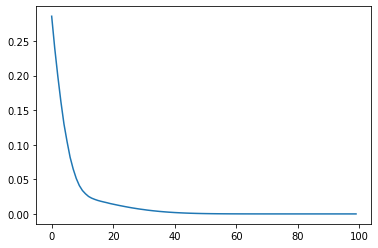

In [ ]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

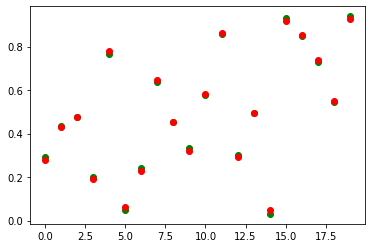

In [ ]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# III. Stacked_LSTM

> ## 1) Model Define & Summary

* return_sequences = True

In [ ]:
model_3 = models.Sequential(name = 'Stackd_LSTM')
model_3.add(layers.LSTM(3,
                        input_shape = (None, 1), 
                        return_sequences = True))
model_3.add(layers.LSTM(3,
                        input_shape = (None, 1),
                        return_sequences = False))
model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stackd_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 3)           60        
_________________________________________________________________
lstm_3 (LSTM)                (None, 3)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [ ]:
model_3.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

> ## 3) Model Fit

In [ ]:
Hist_3 = model_3.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 4s 90ms/step - loss: 0.2060 - accuracy: 0.0125 - val_loss: 0.1800 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1701 - accuracy: 0.0125 - val_loss: 0.1447 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1354 - accuracy: 0.0125 - val_loss: 0.1121 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1050 - accuracy: 0.0125 - val_loss: 0.0831 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0774 - accuracy: 0.0125 - val_loss: 0.0602 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0584 - accuracy: 0.0125 - val_loss: 0.0430 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.0250 - val_loss: 0.0332 - val_accur

> ## 4) Model Predict

In [ ]:
y_hat = model_3.predict(X_test)

> ## 5) 학습 결과 시각화

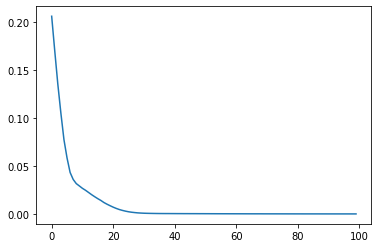

In [ ]:
plt.plot(Hist_3.history['loss'])
plt.show()

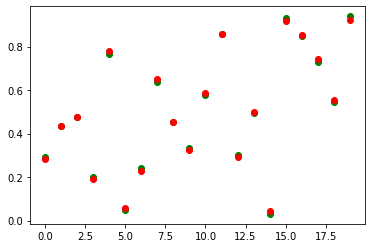

In [ ]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# 
# 
# 
# The End
# 
# 
# 